<a href="https://colab.research.google.com/github/Alwaleed-it/Phthon/blob/main/clv_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (5, 2)

# **Read dataset**

In [ ]:
df = pd.read_csv('/content/clv_data.csv')


# **Data Discovery**

In [ ]:
print("🔍 Data Overview")
print(df.head())
print("\n📏 Data Shape:", df.shape)
print("\n🧩 Columns and Types:\n", df.dtypes)
print("\n❓ Missing Values:\n", df.isnull().sum())
print("\n🎯 Statistical Summary:\n", df.describe(include='all'))

🔍 Data Overview
   Unnamed: 0  id   age  gender  income  days_on_platform           city  \
0           0   0   NaN    Male  126895              14.0  San Francisco   
1           1   1   NaN    Male  161474              14.0          Tokyo   
2           2   2  24.0    Male  104723              34.0         London   
3           3   3  29.0    Male   43791              28.0         London   
4           4   4  18.0  Female  132181              26.0         London   

   purchases  
0          0  
1          0  
2          1  
3          2  
4          2  

📏 Data Shape: (5000, 8)

🧩 Columns and Types:
 Unnamed: 0            int64
id                    int64
age                 float64
gender               object
income                int64
days_on_platform    float64
city                 object
purchases             int64
dtype: object

❓ Missing Values:
 Unnamed: 0             0
id                     0
age                 2446
gender                 0
income                 0
days_o

# **Separate Numerical and Categorical Data**

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("\n🔢 Numerical Columns:", numerical_cols)
print("🔠 Categorical Columns:", categorical_cols)


🔢 Numerical Columns: ['Unnamed: 0', 'id', 'age', 'income', 'days_on_platform', 'purchases']
🔠 Categorical Columns: ['gender', 'city']


# **Univariate Analysis**


📊 Univariate Analysis - Numerical Features


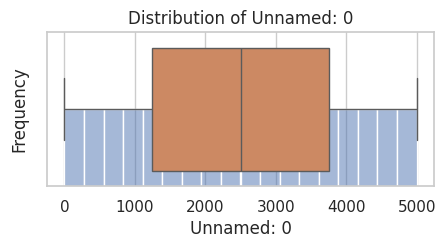

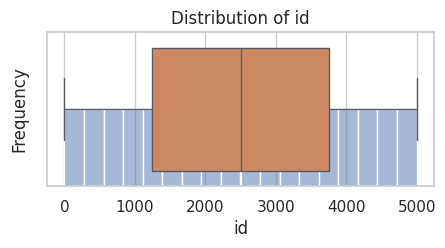

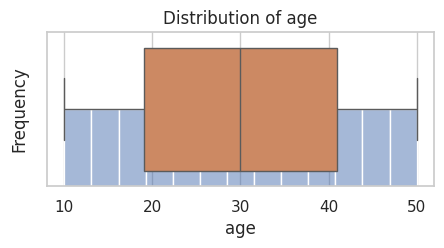

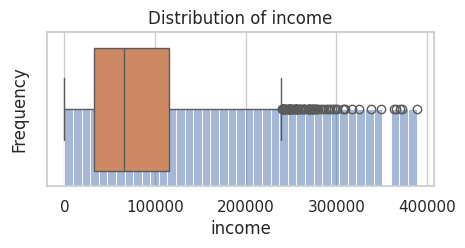

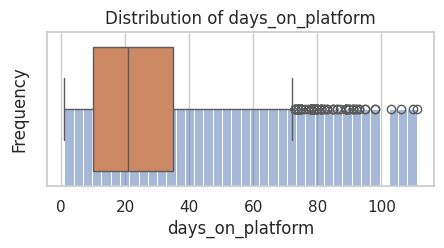

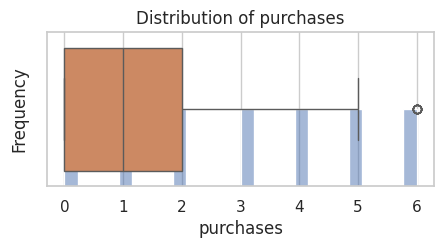


📊 Univariate Analysis - Categorical Features


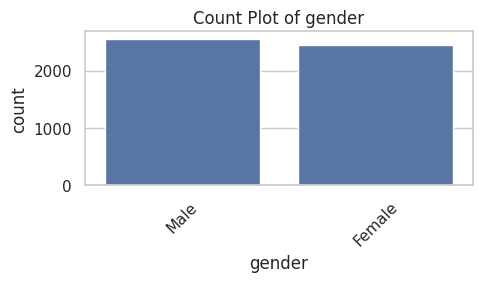

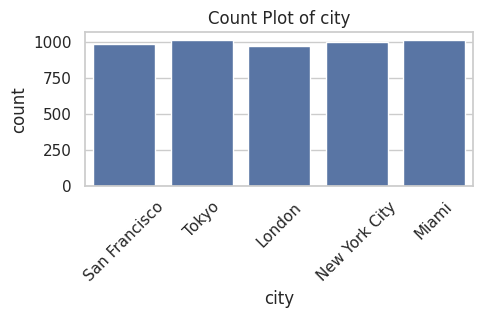

In [ ]:
# Numerical
print("\n📊 Univariate Analysis - Numerical Features")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Categorical
print("\n📊 Univariate Analysis - Categorical Features")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


# **Bivariate Analysis**

In [ ]:
print("\n📈 Bivariate Analysis - Numerical vs Numerical")
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure()
        sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j])
        sns.pairplot(df[numerical_cols])
        plt.title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
        plt.show()

# **Multivariate Analysis**


🌐 Multivariate Analysis - Correlation Heatmap


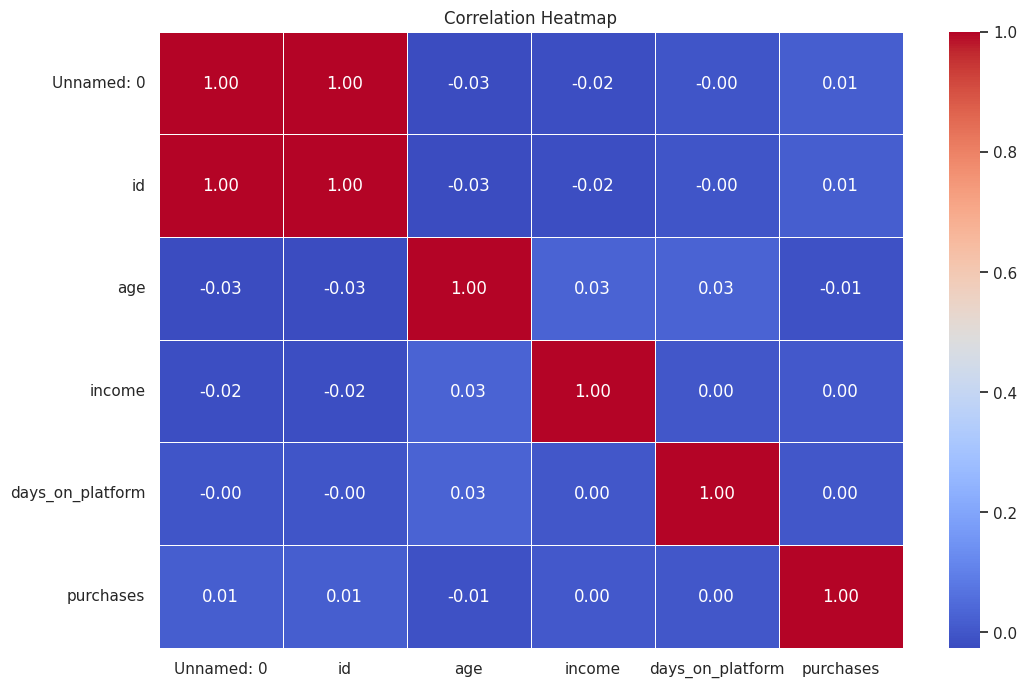

In [ ]:
print("\n🌐 Multivariate Analysis - Correlation Heatmap")
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Preprocessing**

In [ ]:
# 1. معالجة القيم المفقودة
print("🧼 معالجة القيم المفقودة:")
missing = df.isnull().sum()
print(missing[missing > 0])

# نعالج حسب نوع العمود
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])  # الأكثر تكرارًا
        else:
            df[col] = df[col].fillna(df[col].median())   # الوسيط

# التأكد من عدم وجود أي قيم مفقودة الآن
print("\n✅ بعد المعالجة - القيم المفقودة:\n", df.isnull().sum())

# 2. إزالة التكرارات
print("\n🧹 إزالة الصفوف المكررة:")
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"تم حذف {before - after} صف مكرر")

# 3. ترميز البيانات الفئوية
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n🔠 تم ترميز الأعمدة الفئوية:", list(label_encoders.keys()))

# 4. تحويل الأعمدة الزمنية (إن وجدت)
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df.drop(columns=col, inplace=True)  # حذف العمود الأصلي بعد التفصيل

# 5. مقياس القيم العددية (اختياري: Standardization أو Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = df.select_dtypes(include=np.number).columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("\n📐 تم قياس القيم (StandardScaler) على جميع المتغيرات العددية.")

# ✅ البيانات الآن جاهزة
print("\n📦 شكل البيانات بعد المعالجة:", df.shape)
print(df.head())


🧼 معالجة القيم المفقودة:
age                 2446
days_on_platform     141
dtype: int64

✅ بعد المعالجة - القيم المفقودة:
 Unnamed: 0          0
id                  0
age                 0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64

🧹 إزالة الصفوف المكررة:
تم حذف 0 صف مكرر

🔠 تم ترميز الأعمدة الفئوية: ['gender', 'city']

📐 تم قياس القيم (StandardScaler) على جميع المتغيرات العددية.

📦 شكل البيانات بعد المعالجة: (5000, 8)
   Unnamed: 0        id       age   gender    income  days_on_platform  \
0   -1.731704 -1.731704 -0.011906  0.97902  0.784465         -0.575024   
1   -1.731012 -1.731012 -0.011906  0.97902  1.357933         -0.575024   
2   -1.730319 -1.730319 -0.704121  0.97902  0.416758          0.542135   
3   -1.729626 -1.729626 -0.127275  0.97902 -0.593756          0.206987   
4   -1.728933 -1.728933 -1.396335 -1.02143  0.872129          0.095271   

       city  purchases  
0  0.700085  -0.931981  
1